In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

c:\Users\david\anaconda3\envs\Dsci\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [4]:
ON_df = pd.read_csv('data/ON_2021.csv')
AB_df = pd.read_csv('data/AB_BC_2021.csv')

In [5]:
ptax_2021 = pd.concat([ON_df,AB_df], axis=0)

In [6]:
# Need to create common class for commercial/business/nonresidential
ptax_2021[ptax_2021['Municipality'] == 'Hamilton C'].head()

,Year,Municipality,PropertyClass,Rate,Province
555,2021.00,Hamilton C,Residential,0.01,ON
556,2021.00,Hamilton C,Farmland,0.00,ON
557,2021.00,Hamilton C,Commercial,0.02,ON
558,2021.00,Hamilton C,Industrial,0.03,ON


In [7]:
ptax_2021[ptax_2021['Municipality'] == 'EDMONTON'].head()

,Year,Municipality,PropertyClass,Rate,Province
21,2021.00,EDMONTON,NonResidential,0.02,AB
22,2021.00,EDMONTON,Residential,0.01,AB
23,2021.00,EDMONTON,Farm,0.01,AB


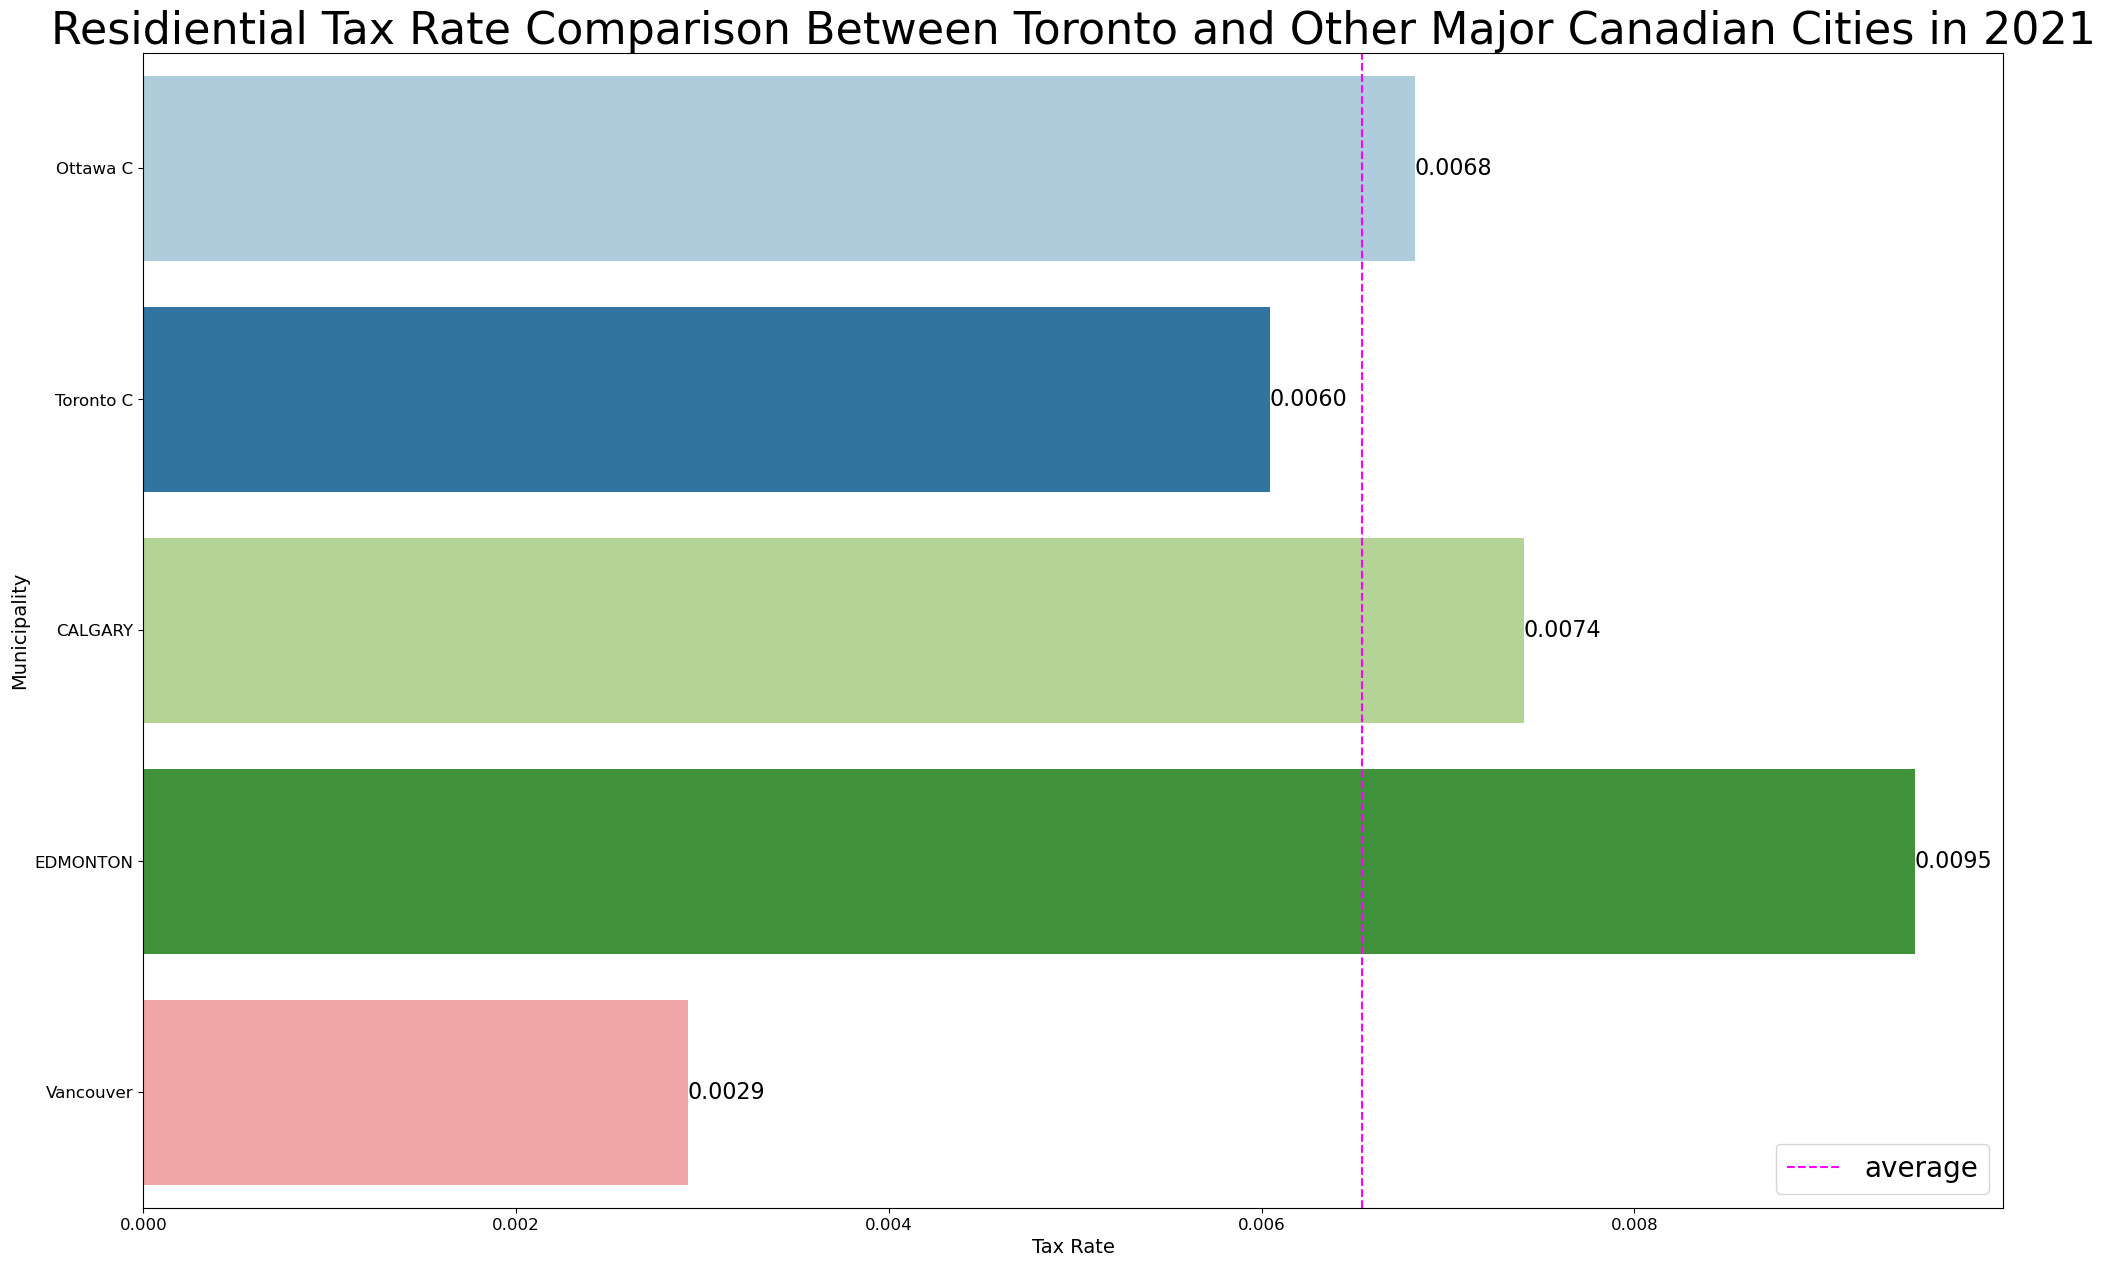

In [8]:
cities = ['Toronto C', 'Ottawa C', 'Vancouver', 'EDMONTON', 'CALGARY']
data = ptax_2021[(ptax_2021['Municipality'].isin(cities)) & (ptax_2021['PropertyClass'] == 'Residential')]

fig, ax = plt.subplots(figsize=(24,15))
fig = sns.barplot(data=data, y='Municipality', x='Rate', orient='h', palette='Paired', dodge=False)
ax.set_xlabel('Tax Rate', fontsize=14)
ax.set_ylabel('Municipality', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.set_title('Residiential Tax Rate Comparison Between Toronto and Other Major Canadian Cities in 2021', fontsize=32)
ax.bar_label(ax.containers[0], fmt='%.4f', fontsize=16)
plt.axvline(data['Rate'].mean(), color='magenta', linestyle='dashed', label='average')
plt.legend(loc='lower right', prop={'size':20})
plt.show()

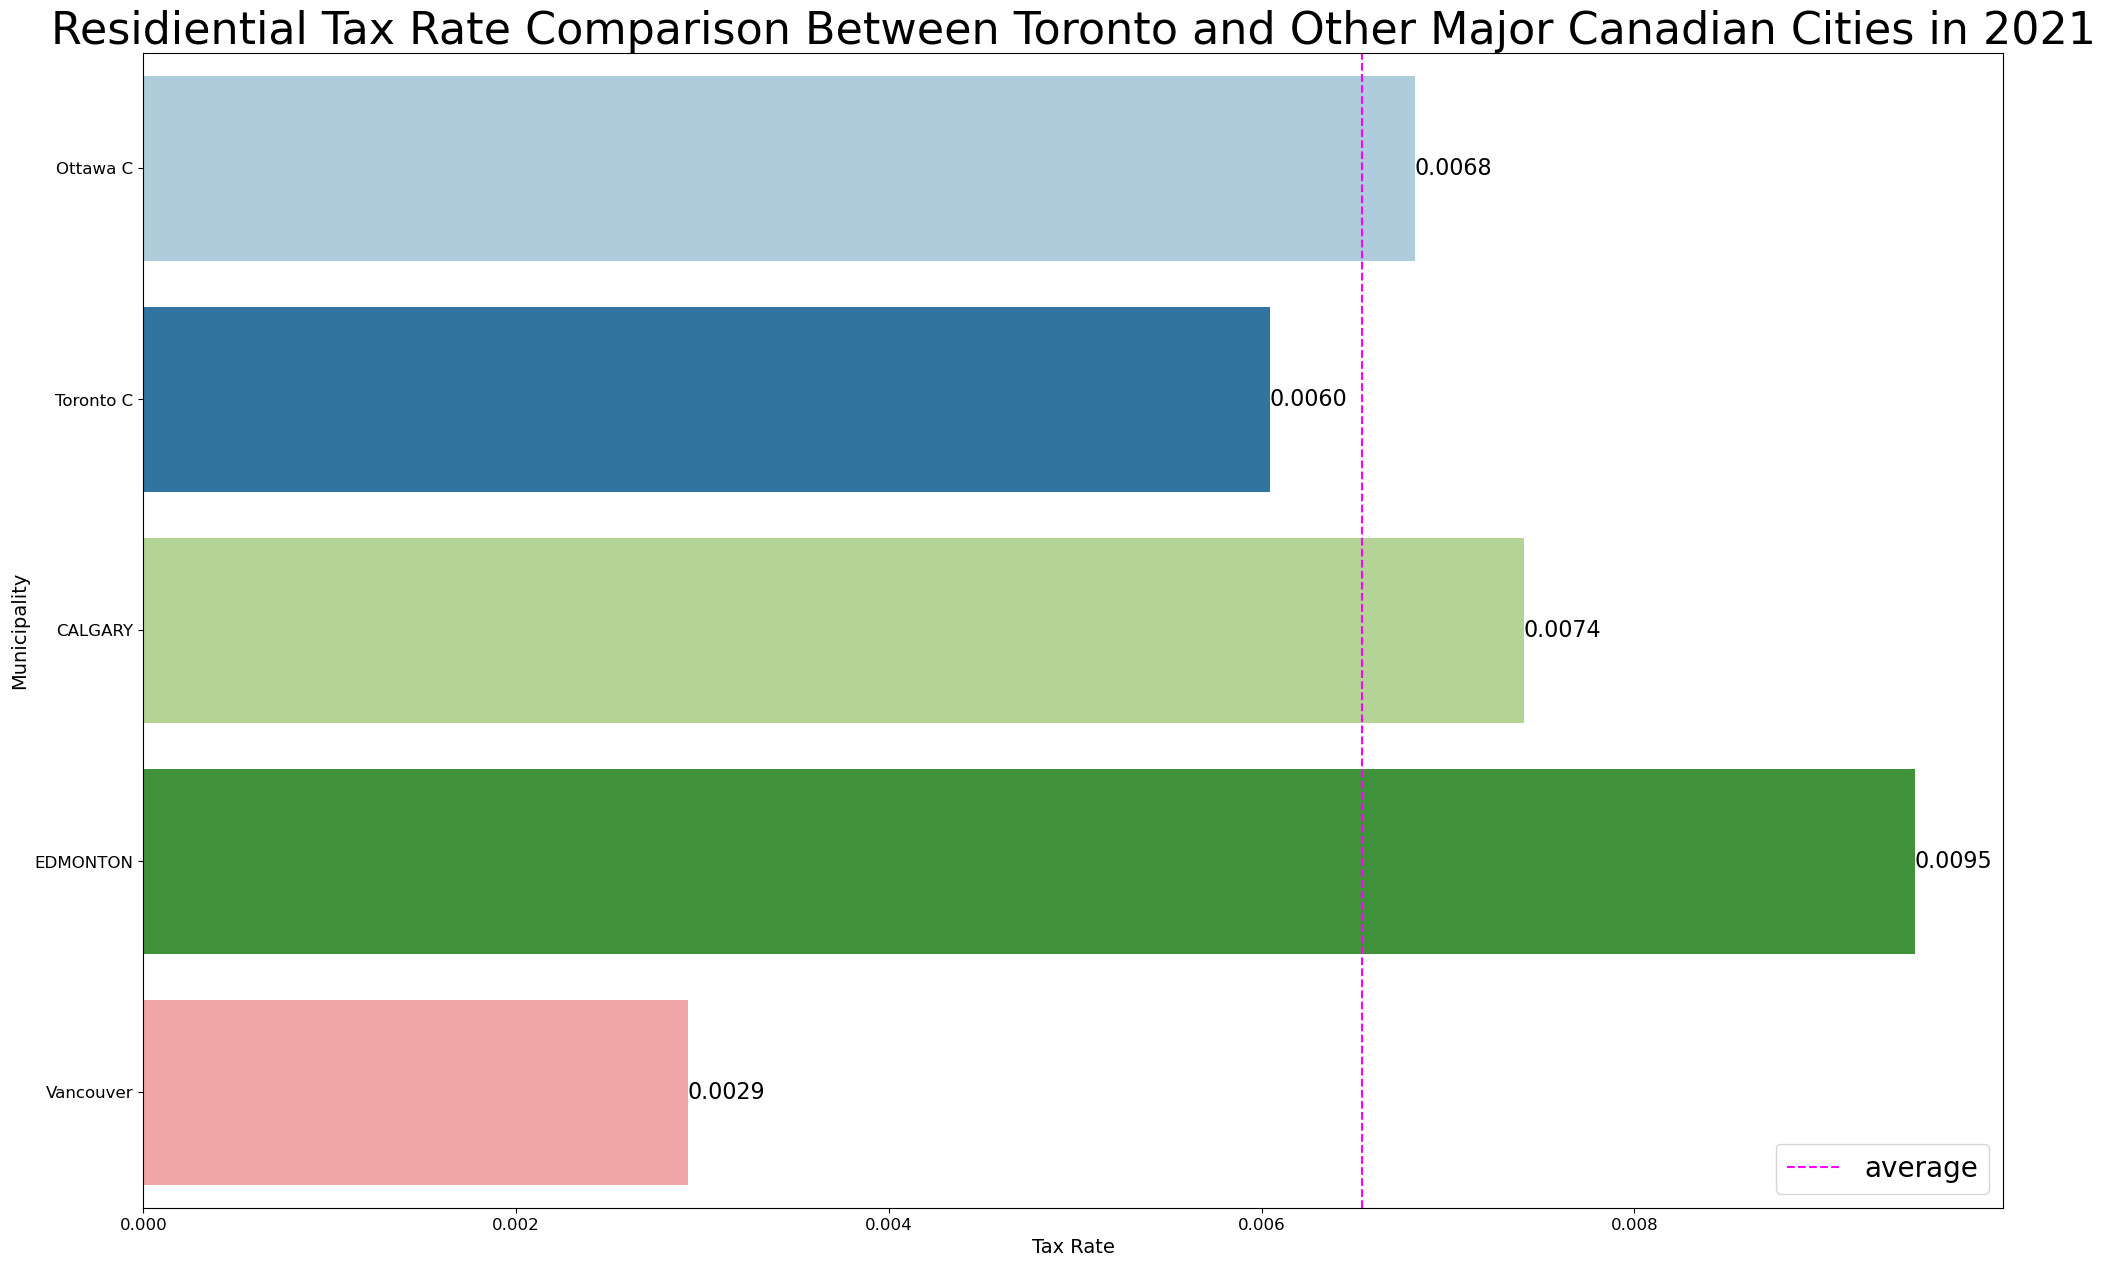

In [9]:
cities = ['Toronto C', 'Ottawa C', 'Vancouver', 'EDMONTON', 'CALGARY']
data = ptax_2021[(ptax_2021['Municipality'].isin(cities)) & (ptax_2021['PropertyClass'] == 'Residential')]

fig, ax = plt.subplots(figsize=(24,15))
fig = sns.barplot(data=data, y='Municipality', x='Rate', orient='h', palette='Paired', dodge=False)
ax.set_xlabel('Tax Rate', fontsize=14)
ax.set_ylabel('Municipality', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.set_title('Residiential Tax Rate Comparison Between Toronto and Other Major Canadian Cities in 2021', fontsize=32)
ax.bar_label(ax.containers[0], fmt='%.4f', fontsize=16)
plt.axvline(data['Rate'].mean(), color='magenta', linestyle='dashed', label='average')
plt.legend(loc='lower right', prop={'size':20})
plt.show()

In [11]:
loc='data/MLS_Data/Not Seasonally Adjusted.xlsx'
mls_data_vancouver = pd.read_excel(loc, sheet_name='Greater_Vancouver')
mls_data_edmonton = pd.read_excel(loc, sheet_name='Edmonton')
mls_data_calgary = pd.read_excel(loc, sheet_name='Calgary')
mls_data_toronto = pd.read_excel(loc, sheet_name='Greater_Toronto')

In [12]:
mls_data_vancouver['City'] = 'Vancouver'
mls_data_edmonton['City'] = 'Edmonton'
mls_data_calgary['City'] = 'Calgary'
mls_data_toronto['City'] = 'Toronto'

In [13]:
mls_data = pd.concat([mls_data_toronto,mls_data_calgary,mls_data_edmonton,mls_data_vancouver], axis=0)

In [14]:
mls_data.shape

(872, 14)

In [15]:
mls_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 0 to 217
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     872 non-null    datetime64[ns]
 1   Composite_HPI            872 non-null    float64       
 2   Single_Family_HPI        872 non-null    float64       
 3   One_Storey_HPI           872 non-null    float64       
 4   Two_Storey_HPI           872 non-null    float64       
 5   Townhouse_HPI            872 non-null    float64       
 6   Apartment_HPI            872 non-null    float64       
 7   Composite_Benchmark      872 non-null    int64         
 8   Single_Family_Benchmark  872 non-null    int64         
 9   One_Storey_Benchmark     872 non-null    int64         
 10  Two_Storey_Benchmark     872 non-null    int64         
 11  Townhouse_Benchmark      872 non-null    int64         
 12  Apartment_Benchmark      872 non-nul

In [16]:
mls_data.drop(columns=['Composite_HPI','Single_Family_HPI','One_Storey_HPI', 'Two_Storey_HPI', 'Townhouse_HPI', 'Apartment_HPI'], inplace=True)

In [17]:
mls_data.reset_index(drop=True, inplace=True)

In [18]:
mls_data_avg_year = mls_data.groupby([pd.to_datetime(mls_data.Date).dt.strftime('%Y'), 'City'])['Composite_Benchmark'].mean().reset_index(name='Avg_Year')

In [33]:
mls_data_avg_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      76 non-null     object 
 1   City      76 non-null     object 
 2   Avg_Year  76 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.9+ KB


In [41]:
mls_data_avg_year['Date'] = mls_data_avg_year['Date'].astype('datetime64[ns]')
mls_data_avg_year['Date'] = mls_data_avg_year.Date.dt.year

In [42]:
mls_data_avg_year.head()

,Date,City,Avg_Year
0,2005,Calgary,227858.33
1,2005,Edmonton,178066.67
2,2005,Toronto,330966.67
3,2005,Vancouver,375391.67
4,2006,Calgary,324083.33


In [43]:
mls_data_taxes2021 = mls_data_avg_year.loc[mls_data_avg_year['Date'] == 2021, :].copy()

In [48]:
ptax_2021.head(2)

,Year,Municipality,PropertyClass,Rate,Province
0,2021.00,Addington Highlands Tp,Residential,0.01,ON
1,2021.00,Addington Highlands Tp,Farmland,0.00,ON


In [51]:
cities = ['Toronto C', 'Vancouver', 'EDMONTON', 'CALGARY']
ptax_2021[(ptax_2021['Municipality'].isin(cities)) & (ptax_2021['PropertyClass'] == 'Residential')]

,Year,Municipality,PropertyClass,Rate,Province
1474,2021.00,Toronto C,Residential,0.01,ON
10,2021.00,CALGARY,Residential,0.01,AB
22,2021.00,EDMONTON,Residential,0.01,AB
1450,2021.00,Vancouver,Residential,0.00,BC


In [53]:
mls_data_taxes2021['Rate'] = ptax_2021[(ptax_2021['Municipality'].isin(cities)) & (ptax_2021['PropertyClass'] == 'Residential')]['Rate']

In [54]:
mls_data_taxes2021

,Date,City,Avg_Year,Rate
64,2021,Calgary,457033.33,NaN
65,2021,Edmonton,369858.33,NaN
66,2021,Toronto,1043725.00,NaN
67,2021,Vancouver,1091141.67,NaN
